In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [23]:
# Load datasets
test_group = pd.read_csv(r"C:\Users\bhavy\Desktop\test_group.csv", delimiter=';')
control_group = pd.read_csv(r"C:\Users\bhavy\Desktop\control_group.csv", delimiter=';')


In [24]:
# Convert date column to datetime
test_group['Date'] = pd.to_datetime(test_group['Date'], dayfirst=True)
control_group['Date'] = pd.to_datetime(control_group['Date'], dayfirst=True)

In [25]:
# Fill missing values in the control group with 0
control_group.fillna(0, inplace=True)

In [26]:
# Define key metrics for analysis
metrics = ['# of Website Clicks', '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']


In [27]:
# Calculate conversion rates for both groups
for metric in metrics:
    test_group[f'CR_{metric}'] = np.where(test_group['# of Impressions'] > 0, test_group[metric] / test_group['# of Impressions'], 0)
    control_group[f'CR_{metric}'] = np.where(control_group['# of Impressions'] > 0, control_group[metric] / control_group['# of Impressions'], 0)


C:\Users\bhavy\AppData\Local\Temp\ipykernel_11492\2107137507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_group[f'CR_{metric}'], label=f'Test {metric}', shade=True)
C:\Users\bhavy\AppData\Local\Temp\ipykernel_11492\2107137507.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(control_group[f'CR_{metric}'], label=f'Control {metric}', shade=True)
C:\Users\bhavy\AppData\Local\Temp\ipykernel_11492\2107137507.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_group[f'CR_{metric}'], label=f'Test {metric}', shade=True)
C:\Users\bhavy\AppData\Local\Temp\ipykernel_11492\2107137507.py:5: FutureWarning: 

`shade`

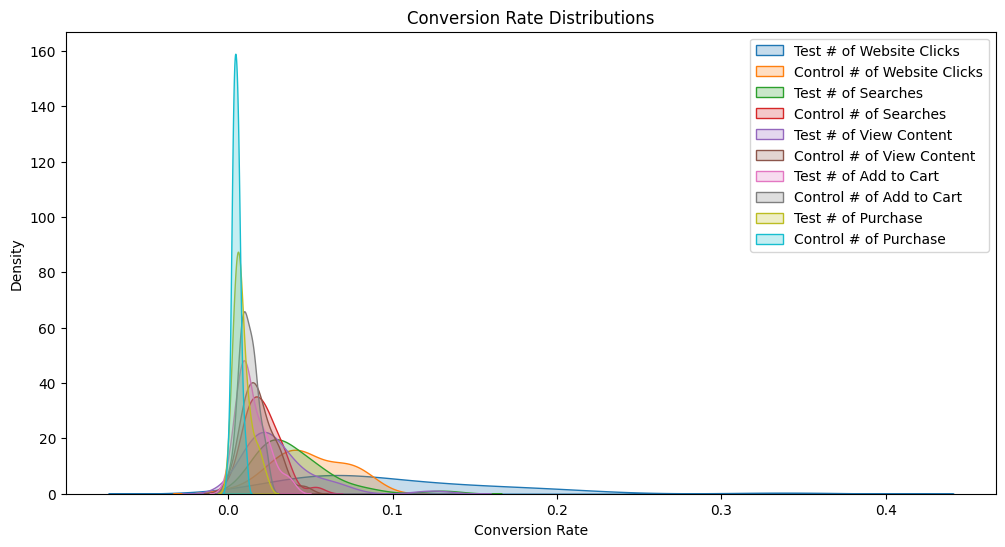

In [28]:
# Plot conversion rates
plt.figure(figsize=(12, 6))
for metric in metrics:
    sns.kdeplot(test_group[f'CR_{metric}'], label=f'Test {metric}', shade=True)
    sns.kdeplot(control_group[f'CR_{metric}'], label=f'Control {metric}', shade=True)
plt.legend()
plt.title('Conversion Rate Distributions')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.show()

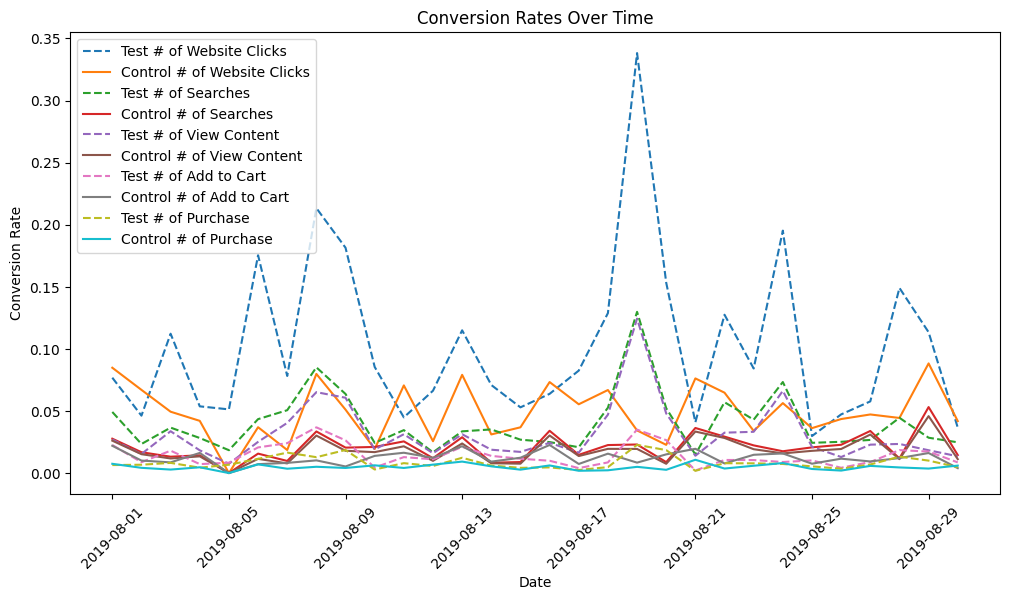

In [29]:
# Time series plot of conversion rates
plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(test_group['Date'], test_group[f'CR_{metric}'], label=f'Test {metric}', linestyle='--')
    plt.plot(control_group['Date'], control_group[f'CR_{metric}'], label=f'Control {metric}')
plt.legend()
plt.title('Conversion Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Conduct t-tests for conversion rates
results = {}
for metric in metrics:
    stat, p_value = stats.ttest_ind(test_group[f'CR_{metric}'], control_group[f'CR_{metric}'], equal_var=False)
    results[metric] = {'t-statistic': stat, 'p-value': p_value}

# Display test results
results_df = pd.DataFrame(results).T
print("A/B Test Results:")
print(results_df)

A/B Test Results:
                     t-statistic   p-value
# of Website Clicks     4.086552  0.000241
# of Searches           4.091982  0.000200
# of View Content       2.876593  0.006505
# of Add to Cart        1.231564  0.224105
# of Purchase           3.445907  0.001350


In [31]:
# Interpretation of results
alpha = 0.05
significant_results = results_df[results_df['p-value'] < alpha]
if not significant_results.empty:
    print("\nSignificant differences found in:")
    print(significant_results)
else:
    print("\nNo statistically significant difference found between test and control groups.")



Significant differences found in:
                     t-statistic   p-value
# of Website Clicks     4.086552  0.000241
# of Searches           4.091982  0.000200
# of View Content       2.876593  0.006505
# of Purchase           3.445907  0.001350
